In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df1 = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\futurense project\Data sets\TokensPaidWithoutLeadID.csv")

In [5]:
print(df1.head())

      Name created_date   paid_date    cohort              source  \
0  sudheer   2023-08-25  2023-08-30  cohort 1            linkedin   
1   swathi   2023-09-19  2023-10-06  cohort 1            linkedin   
2    kabir   2024-03-21  2024-03-23  cohort 2  inbound phone call   
3   vikash   2023-08-05  2023-08-14  cohort 1            linkedin   
4     amir   2023-08-07  2023-08-08  cohort 1        zoom webinar   

               agent        counsellor                           prospect_id  \
0    shaqlain sheikh  shailendra singh  d7d7ba30-8207-4a00-a2f0-72c9718a9ad7   
1              rohit             aarti  9f8bb6d3-d30e-4f73-baa8-8e1ae4dd3517   
2  siddharth goswami     aviral sharma  0acf038e-e696-11ee-807d-02e22ea38447   
3    shaqlain sheikh            zareen  aa13b8b9-cff5-41fe-a1f5-353e4c90ab04   
4    shaqlain sheikh  shailendra singh  b78be1f5-34f1-11ee-a17b-0a9468bc4542   

           status  
0  INACTIVE TOKEN  
1  INACTIVE TOKEN  
2    active token  
3  INACTIVE TOKEN  
4  I

In [72]:
df1.columns

Index(['Name', 'created_date', 'paid_date', 'cohort', 'source', 'agent',
       'counsellor', 'prospect_id', 'status'],
      dtype='object')

In [73]:
df1.shape

(264, 9)

In [74]:
df1.dtypes

Name            object
created_date    object
paid_date       object
cohort          object
source          object
agent           object
counsellor      object
prospect_id     object
status          object
dtype: object

In [75]:
df1.isnull().sum()

Name            0
created_date    0
paid_date       0
cohort          0
source          0
agent           0
counsellor      0
prospect_id     0
status          0
dtype: int64

In [76]:
df1.describe(include = 'all')

,Name,created_date,paid_date,cohort,source,agent,counsellor,prospect_id,status
count,264,264,264,264,264,264,264,264,264
unique,238,152,130,2,23,43,13,264,2
top,abhishek,2024-01-27,2024-02-11,cohort 2,facebook,fahim moshin shaikh,shailendra singh,d7d7ba30-8207-4a00-a2f0-72c9718a9ad7,active token
freq,3,22,7,238,82,37,74,1,238


In [77]:
df1.nunique()

Name            238
created_date    152
paid_date       130
cohort            2
source           23
agent            43
counsellor       13
prospect_id     264
status            2
dtype: int64

In [78]:
df1['cohort'].value_counts()

cohort 2    238
cohort 1     26
Name: cohort, dtype: int64

In [79]:
df1['status'].value_counts()

active token      238
INACTIVE TOKEN     26
Name: status, dtype: int64

In [80]:
df1['source'].nunique()

23

In [81]:
df1['source'].value_counts()

facebook                       82
linkedin                       48
zoom webinar                   37
1% club                        24
referral                       19
us pathway                      9
n-db                            7
futurense usp - website         7
placement drive                 6
googleads                       4
b.tech 19-20 grad               4
No Source                       4
usp support                     3
inbound phone call              1
calendly                        1
futurense employee referral     1
1% club/ b.tech 19-20 grad      1
lpu                             1
website                         1
ig                              1
fb lead ads                     1
os                              1
17th sept hot leads             1
Name: source, dtype: int64

In [82]:
duplicate_rows = df1.duplicated().sum()
duplicate_rows

0

In [83]:
df1['agent'].nunique()

43

In [84]:
df1['agent'].value_counts()

fahim moshin shaikh     37
ayush dixit             27
saket rai               22
chitwan soni            22
bompada sai sudeep      20
abid bhat               17
pawan tiwari            16
jatin luthra            10
suryansh tiwari          9
aditya vijayâ singh      8
prapti lohan             8
shrey goel               6
shaqlain sheikh          5
rohini rao dhara         4
ratnesh mishra           4
vaibhav kumar sharma     4
sonu mishra              3
yashi tiwari             3
janvi aggarwal           3
khyati                   3
payal dhiman             3
ishant kakkar            2
nickil jadhav            2
aviral sharma            2
arabinda palai           2
swapnil awasthi          2
simran singh             2
rohit                    2
dolly minocha            2
abhishek singh           1
nikta                    1
akasima deka             1
sagar tiwari             1
shushant verma           1
afzal ahmad              1
kamal singh              1
priyanshu tonk           1
s

In [85]:
df1['counsellor'].nunique()

13

In [86]:
df1['counsellor'].value_counts()

shailendra singh       74
diptikanta jena        51
aviral sharma          48
rishabh tripathi       40
muskan                 15
shashwat               12
anshika vishwakarma     8
vibhav walia            7
aarti                   3
zareen                  2
No Counsellor           2
shitanshu rai           1
manish yadav            1
Name: counsellor, dtype: int64

In [87]:
agent_counsellor_pair = df1.groupby(['agent','counsellor']).size().sort_values(ascending=False).head()
agent_counsellor_pair

agent                counsellor      
fahim moshin shaikh  shailendra singh    31
chitwan soni         aviral sharma       17
ayush dixit          diptikanta jena     12
                     rishabh tripathi     8
pawan tiwari         diptikanta jena      7
dtype: int64

In [88]:
created_date_range = (df1['created_date'].min(), df1['created_date'].max())
created_date_range 

('2023-01-04', '2024-04-28')

In [89]:
paid_date_range = (df1['paid_date'].min(), df1['paid_date'].max())
paid_date_range

('2023-08-08', '2024-05-03')

In [93]:
def filter_data(df, column_name, input_value):
    filtered_data = df[df[column_name] == input_value]
    return filtered_data

print("Enter the column you want to filter by (source, agent, counsellor):")
column_name = input().strip()

print(f"Enter the {column_name} you want to filter by:")
input_value = input().strip()
df1 = filter_data(df1, column_name, input_value)
print("Filtered Data (Without Lead ID):")
print(df1)

Enter the column you want to filter by (source, agent, counsellor):
counsellor
Enter the counsellor you want to filter by:
shilendar singh
Filtered Data (Without Lead ID):
Empty DataFrame
Columns: [Name, created_date, paid_date, cohort, source, agent, counsellor, prospect_id, status]
Index: []


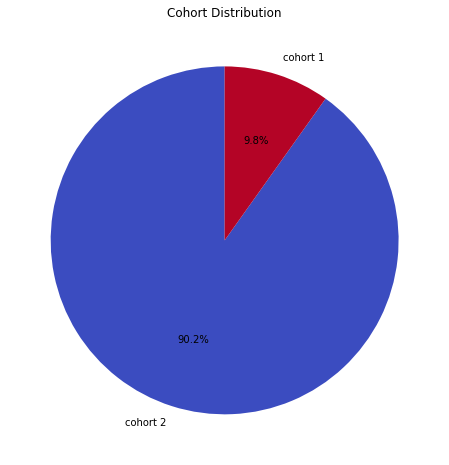

In [92]:
plt.figure(figsize=(10, 8))
df1['cohort'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='coolwarm')
plt.title('Cohort Distribution')
plt.ylabel('')
plt.show()

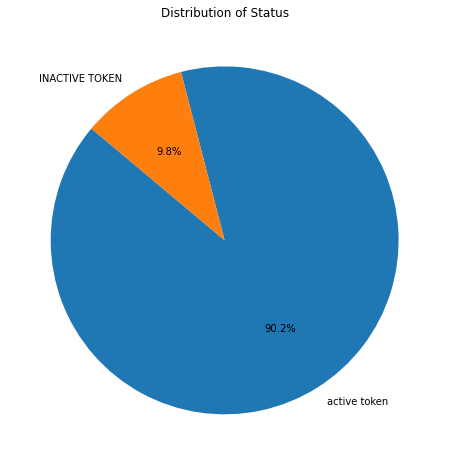

In [91]:
status_counts = df1['status'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Status')
plt.show()

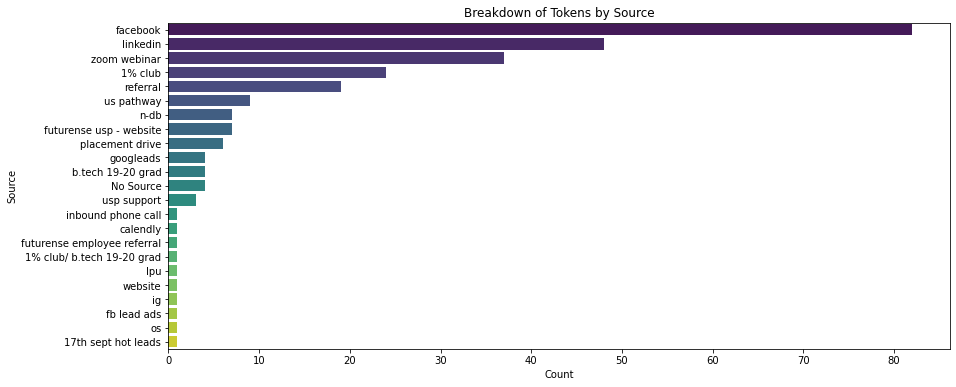

In [101]:
plt.figure(figsize=(14, 6))
sns.countplot(y='source', data=df1, order=df1['source'].value_counts().index, palette='viridis')
plt.title('Breakdown of Tokens by Source')
plt.xlabel('Count')
plt.ylabel('Source')
plt.show()

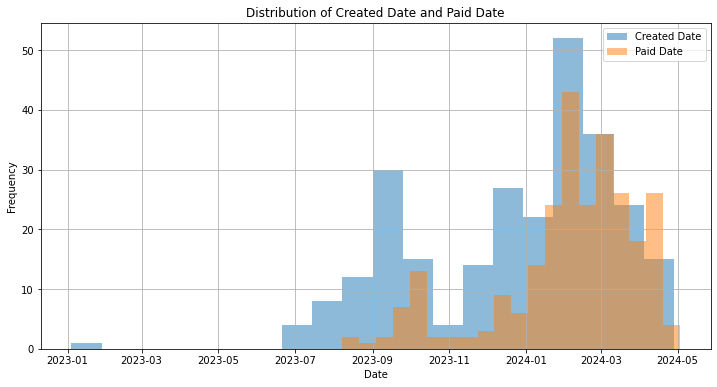

In [106]:
df1['created_date'] = pd.to_datetime(df1['created_date'], errors='coerce')
df1['paid_date'] = pd.to_datetime(df1['paid_date'], errors='coerce')

plt.figure(figsize=(12, 6))
df1['created_date'].dt.date.hist(bins=20, alpha=0.5, label='Created Date')
df1['paid_date'].dt.date.hist(bins=20, alpha=0.5, label='Paid Date')
plt.title('Distribution of Created Date and Paid Date')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend()
plt.show()

<Figure size 864x432 with 0 Axes>

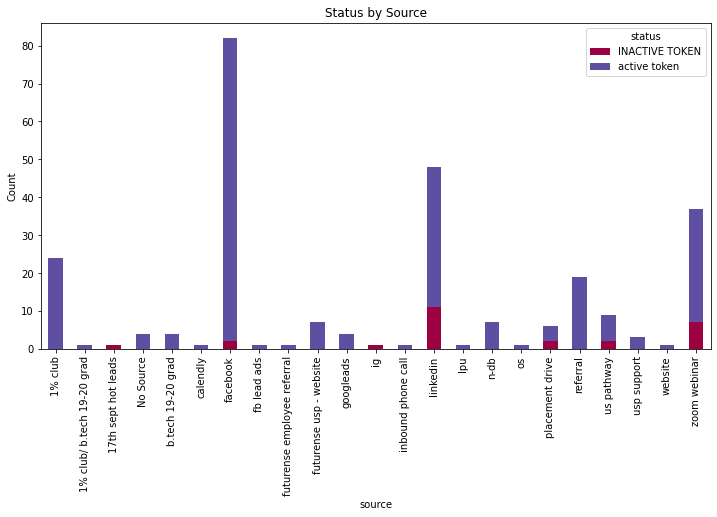

In [107]:
plt.figure(figsize=(12, 6))
status_source_counts = pd.crosstab(df1['source'], df1['status'])
status_source_counts.plot(kind='bar', stacked=True, colormap='Spectral', figsize=(12, 6))
plt.title('Status by Source')
plt.ylabel('Count')
plt.show()

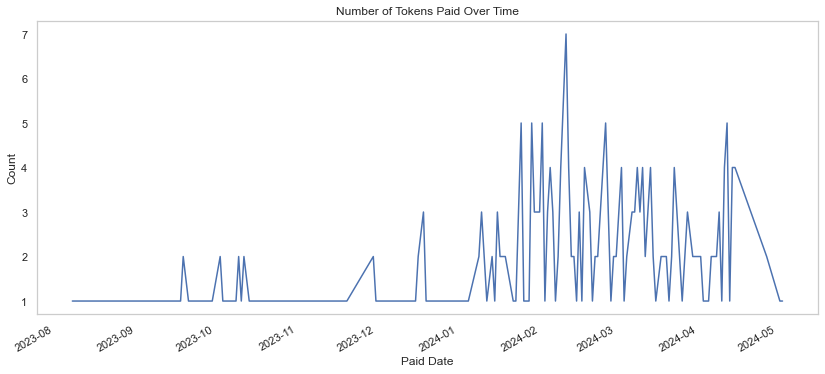

In [115]:
tokens_per_date = df1['paid_date'].value_counts().sort_index()
plt.figure(figsize=(14, 6))
tokens_per_date.plot(kind='line')
plt.title('Number of Tokens Paid Over Time')
plt.xlabel('Paid Date')
plt.ylabel('Count')
plt.grid(False)
plt.show()

In [116]:
df1['time_difference'] = (df1['paid_date'] - df1['created_date']).dt.days

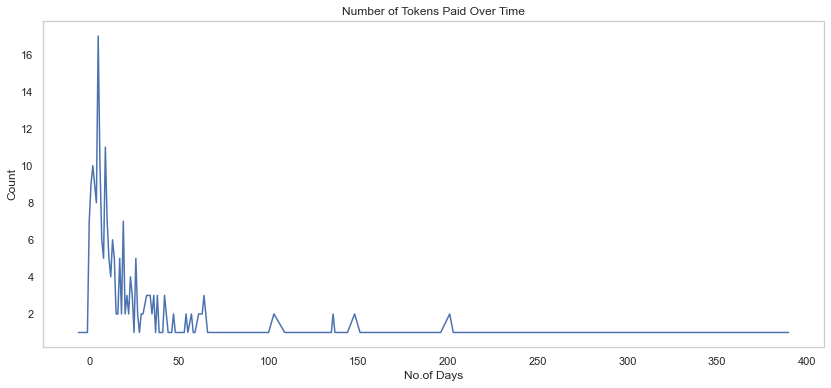

In [118]:
df1['time_difference'] = (df1['paid_date'] - df1['created_date']).dt.days
tokens_per_date = df1['time_difference'].value_counts().sort_index()
plt.figure(figsize=(14, 6))
tokens_per_date.plot(kind='line')
plt.title('Number of Tokens Paid Over Time')
plt.xlabel('No.of Days')
plt.ylabel('Count')
plt.grid(False)
plt.show()

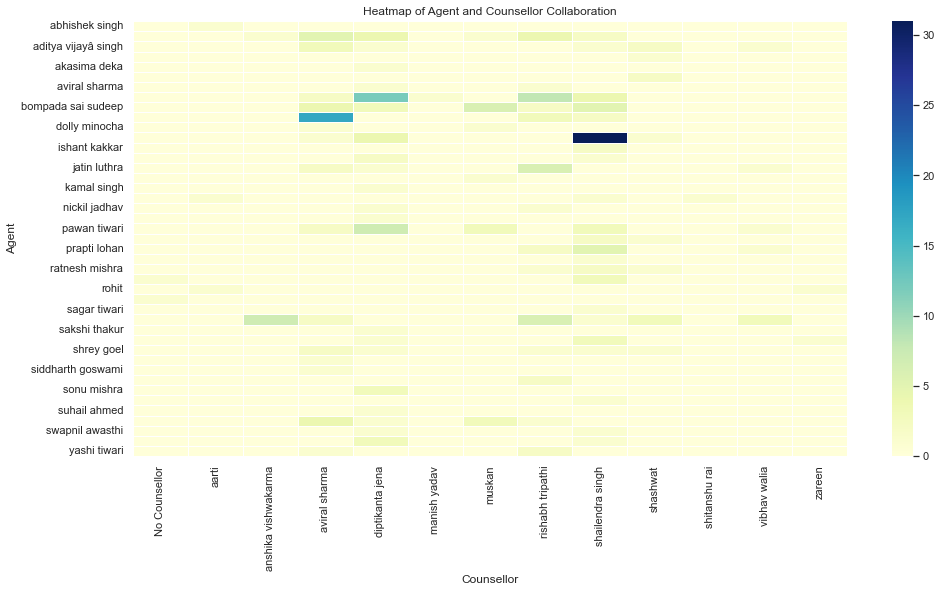

In [120]:
collaboration_matrix = pd.crosstab(df1['agent'], df1['counsellor'])
plt.figure(figsize=(16, 8))
sns.heatmap(collaboration_matrix, cmap='YlGnBu', annot=False, linewidths=0.5)
plt.title('Heatmap of Agent and Counsellor Collaboration')
plt.xlabel('Counsellor')
plt.ylabel('Agent')
plt.show()

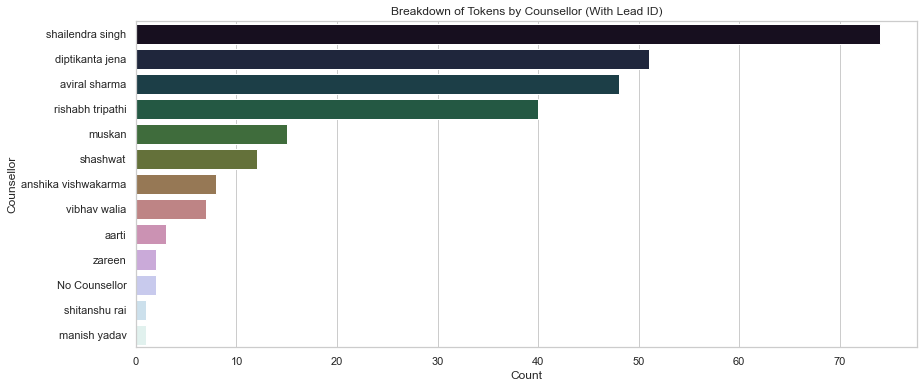

In [158]:
plt.figure(figsize=(14, 6))
sns.countplot(y='counsellor', data=df1, order=df1['counsellor'].value_counts().index, palette='cubehelix')
plt.title('Breakdown of Tokens by Counsellor (With Lead ID)')
plt.xlabel('Count')
plt.ylabel('Counsellor')
plt.show()

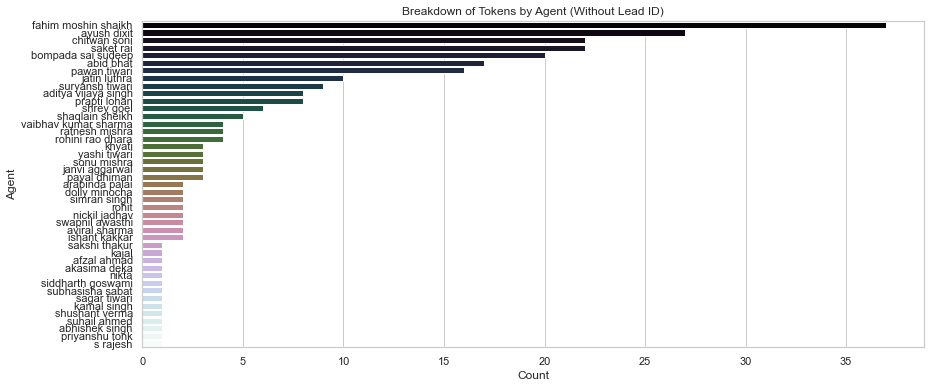

In [159]:
plt.figure(figsize=(14, 6))
sns.countplot(y='agent', data=df1, order=df1['agent'].value_counts().index, palette='cubehelix')
plt.title('Breakdown of Tokens by Agent (Without Lead ID)')
plt.xlabel('Count')
plt.ylabel('Agent')
plt.show()

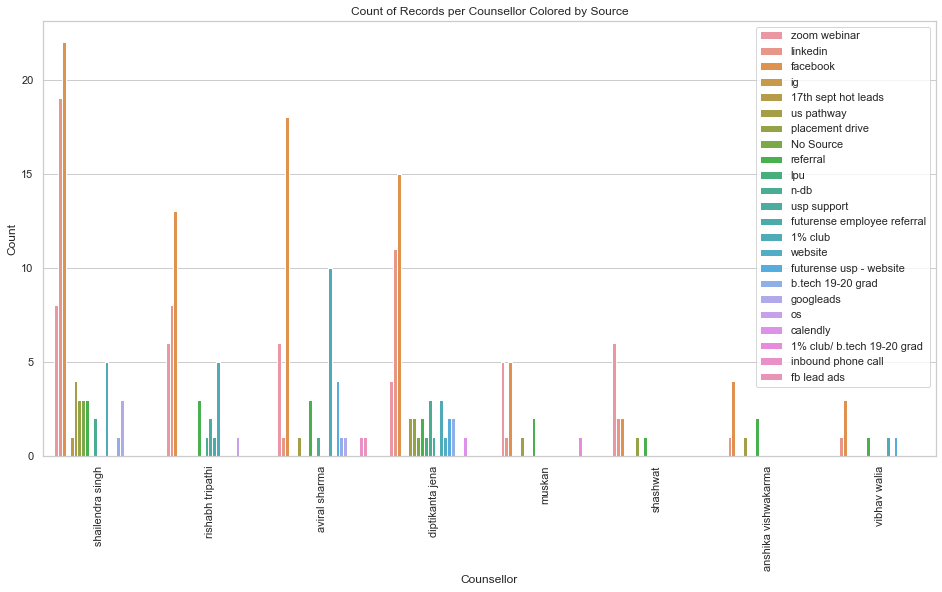

In [167]:
plt.figure(figsize=(16, 8))
sns.countplot(data=df1, x='counsellor', hue='source', order=df2['counsellor'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Count of Records per Counsellor Colored by Source')
plt.xlabel('Counsellor')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

Chi-square: 252.8570400662875, p-value: 6.188608944220951e-57


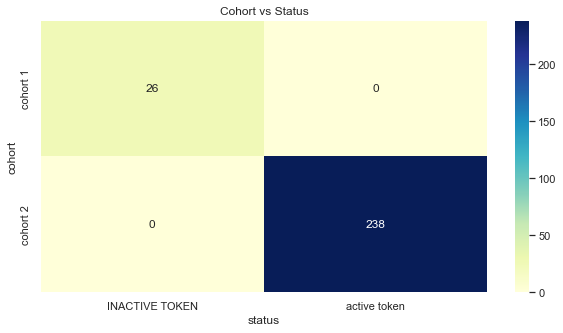

In [168]:
from scipy.stats import chi2_contingency

# Bivariate analysis - Relationship between 'cohort' and 'status'
cohort_status_ct = pd.crosstab(df1['cohort'], df1['status'])

# Chi-square test to check the significance of the relationship
chi2, p, dof, ex = chi2_contingency(cohort_status_ct)
print(f"Chi-square: {chi2}, p-value: {p}")

# Visualization: Heatmap of Cohort vs Status
plt.figure(figsize=(10, 5))
sns.heatmap(cohort_status_ct, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Cohort vs Status")
plt.show()


In [143]:
numerical_columns = df1.select_dtypes(include=['float64', 'int64'])

if numerical_columns.empty:
    print("No numerical columns available for outlier detection.")
else:
    print("Outlier detection can be applied.")


Outlier detection can be applied.


# Conversion Rate

In [151]:
total_without_lead_id = df1.shape[0]
active_without_lead_id = df1[df1['status'] == 'active token'].shape[0]
conversion_rate_without_lead_id = active_without_lead_id / total_without_lead_id
print("Conversion Rate Without Lead ID:", conversion_rate_without_lead_id)

Conversion Rate Without Lead ID: 0.9015151515151515


# Source Performance

In [156]:
source_performance = df1.groupby('source')['status'].value_counts(normalize=True).unstack().fillna(0)
print(source_performance)

status                       INACTIVE TOKEN  active token
source                                                   
1% club                            0.000000      1.000000
1% club/ b.tech 19-20 grad         0.000000      1.000000
17th sept hot leads                1.000000      0.000000
No Source                          0.000000      1.000000
b.tech 19-20 grad                  0.000000      1.000000
calendly                           0.000000      1.000000
facebook                           0.024390      0.975610
fb lead ads                        0.000000      1.000000
futurense employee referral        0.000000      1.000000
futurense usp - website            0.000000      1.000000
googleads                          0.000000      1.000000
ig                                 1.000000      0.000000
inbound phone call                 0.000000      1.000000
linkedin                           0.229167      0.770833
lpu                                0.000000      1.000000
n-db          

# Agent Performance

In [155]:
agent_performance = df1.groupby('agent')['status'].value_counts(normalize=True).unstack().fillna(0)
print(agent_performance)

status                INACTIVE TOKEN  active token
agent                                             
abhishek singh              1.000000      0.000000
abid bhat                   0.000000      1.000000
aditya vijayâ singh         0.000000      1.000000
afzal ahmad                 0.000000      1.000000
akasima deka                1.000000      0.000000
arabinda palai              0.000000      1.000000
aviral sharma               0.000000      1.000000
ayush dixit                 0.037037      0.962963
bompada sai sudeep          0.000000      1.000000
chitwan soni                0.000000      1.000000
dolly minocha               0.000000      1.000000
fahim moshin shaikh         0.216216      0.783784
ishant kakkar               1.000000      0.000000
janvi aggarwal              0.000000      1.000000
jatin luthra                0.000000      1.000000
kajal                       0.000000      1.000000
kamal singh                 0.000000      1.000000
khyati                      1.0

# Counsellor Performance

In [154]:
counsellor_performance = df1.groupby('counsellor')['status'].value_counts(normalize=True).unstack().fillna(0)
print(counsellor_performance)

status               INACTIVE TOKEN  active token
counsellor                                       
No Counsellor              0.000000      1.000000
aarti                      1.000000      0.000000
anshika vishwakarma        0.000000      1.000000
aviral sharma              0.000000      1.000000
diptikanta jena            0.058824      0.941176
manish yadav               0.000000      1.000000
muskan                     0.000000      1.000000
rishabh tripathi           0.000000      1.000000
shailendra singh           0.229730      0.770270
shashwat                   0.000000      1.000000
shitanshu rai              1.000000      0.000000
vibhav walia               0.000000      1.000000
zareen                     1.000000      0.000000


In [150]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df1['status'])

X = df1.drop('status', axis=1).apply(LabelEncoder().fit_transform)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.9875
Classification Report:
                 precision    recall  f1-score   support

INACTIVE TOKEN       1.00      0.89      0.94         9
  active token       0.99      1.00      0.99        71

      accuracy                           0.99        80
     macro avg       0.99      0.94      0.97        80
  weighted avg       0.99      0.99      0.99        80



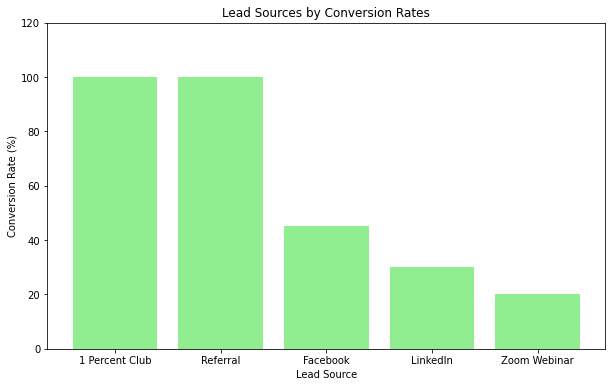

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

conversion_data = {'Source': ['1 Percent Club', 'Referral', 'Facebook', 'LinkedIn', 'Zoom Webinar'],
                   'Conversion Rate (%)': [100, 100, 45, 30, 20]}

conversion_df = pd.DataFrame(conversion_data)

plt.figure(figsize=(10, 6))
plt.bar(conversion_df['Source'], conversion_df['Conversion Rate (%)'], color='lightgreen')
plt.title('Lead Sources by Conversion Rates')
plt.xlabel('Lead Source')
plt.ylabel('Conversion Rate (%)')
plt.ylim(0, 120)
plt.show()


In [12]:
import pandas as pd


agent_counsellor_pairs = df1.groupby(['agent', 'counsellor']).size().sort_values(ascending=False)

print(agent_counsellor_pairs.head())


agent                counsellor      
fahim moshin shaikh  shailendra singh    31
chitwan soni         aviral sharma       17
ayush dixit          diptikanta jena     12
                     rishabh tripathi     8
pawan tiwari         diptikanta jena      7
dtype: int64


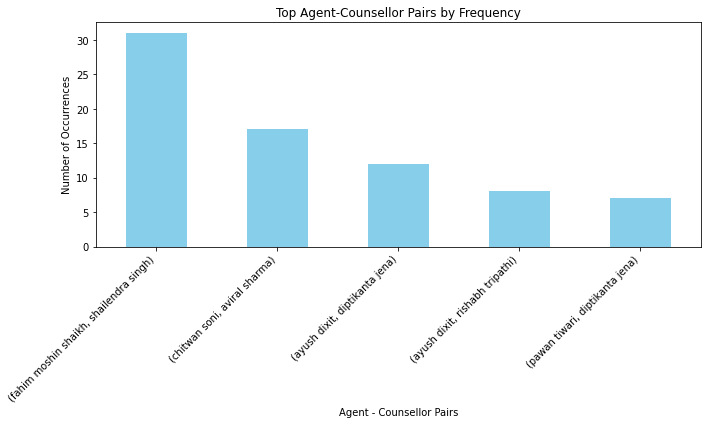

In [13]:
import matplotlib.pyplot as plt

agent_counsellor_pairs = df1.groupby(['agent', 'counsellor']).size().sort_values(ascending=False).head()

plt.figure(figsize=(10, 6))
agent_counsellor_pairs.plot(kind='bar', color='skyblue')
plt.title('Top Agent-Counsellor Pairs by Frequency')
plt.xlabel('Agent - Counsellor Pairs')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


In [18]:
import pandas as pd

agent_conversion = df1.groupby('agent').agg(
    total_leads=('status', 'count'),
    successful_conversions=('status', lambda x: (x == 'active token').sum())
)

agent_conversion['conversion_rate'] = agent_conversion['successful_conversions'] / agent_conversion['total_leads']

high_conversion_agents = agent_conversion[agent_conversion['conversion_rate'] == 1.0]

print("Agents with 100% Conversion Rates:")
print(high_conversion_agents[['total_leads', 'successful_conversions']])


Agents with 100% Conversion Rates:
                      total_leads  successful_conversions
agent                                                    
abid bhat                      17                      17
aditya vijayâ singh             8                       8
afzal ahmad                     1                       1
arabinda palai                  2                       2
aviral sharma                   2                       2
bompada sai sudeep             20                      20
chitwan soni                   22                      22
dolly minocha                   2                       2
janvi aggarwal                  3                       3
jatin luthra                   10                      10
kajal                           1                       1
kamal singh                     1                       1
nickil jadhav                   2                       2
pawan tiwari                   16                      16
prapti lohan                    8    

In [19]:
counsellor_conversion = df1.groupby('counsellor').agg(
    total_leads=('status', 'count'),
    successful_conversions=('status', lambda x: (x == 'active token').sum())
)

counsellor_conversion['conversion_rate'] = counsellor_conversion['successful_conversions'] / counsellor_conversion['total_leads']

high_conversion_counsellors = counsellor_conversion[counsellor_conversion['conversion_rate'] == 1.0]

print("\nCounsellors with 100% Conversion Rates:")
print(high_conversion_counsellors[['total_leads', 'successful_conversions']])



Counsellors with 100% Conversion Rates:
                     total_leads  successful_conversions
counsellor                                              
No Counsellor                  2                       2
anshika vishwakarma            8                       8
aviral sharma                 48                      48
manish yadav                   1                       1
muskan                        15                      15
rishabh tripathi              40                      40
shashwat                      12                      12
vibhav walia                   7                       7


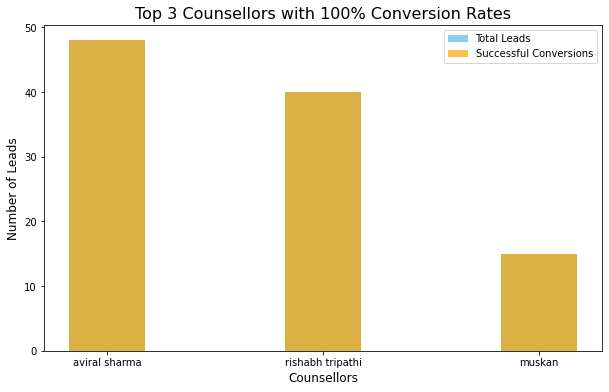

In [20]:
import matplotlib.pyplot as plt

top_3_counsellors = high_conversion_counsellors.sort_values(by='total_leads', ascending=False).head(3)

plt.figure(figsize=(10, 6))
bar_width = 0.35

index = range(len(top_3_counsellors))

plt.bar(index, top_3_counsellors['total_leads'], bar_width, label='Total Leads', color='skyblue')

plt.bar(index, top_3_counsellors['successful_conversions'], bar_width, label='Successful Conversions', color='orange', alpha=0.7)

plt.xlabel('Counsellors', fontsize=12)
plt.ylabel('Number of Leads', fontsize=12)
plt.title('Top 3 Counsellors with 100% Conversion Rates', fontsize=16)
plt.xticks(index, top_3_counsellors.index, fontsize=10)
plt.legend()

plt.show()
